In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')

In [68]:
df.shape

(142193, 24)

In [69]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [70]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [72]:
numerical_features = []
for i in df.columns:
    if df[i].dtype!='O':
        numerical_features.append(i)

In [73]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [74]:
categorical_features = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_features.append(i)

In [75]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [76]:
df[categorical_features].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [77]:
# Missing values in categorical features
df[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [78]:
for col in categorical_features:
    print(df[col].value_counts())
    print('============')

Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith  

In [79]:
for col in categorical_features:
    print(col)
    print(df[col].nunique())
    print('==========')

Date
3436
Location
49
WindGustDir
16
WindDir9am
16
WindDir3pm
16
RainToday
2
RainTomorrow
2


In [80]:
## date - 2018-05-01 -- year, month,date
## date - Time -0,50
df['Date'] = pd.to_datetime(df['Date']) # this line will convert the date column into standard datetime format
df['Year'] = df['Date'].dt.year # .dt.year - extract year number from the datetime column
df['Month'] = df['Date'].dt.month # .dt.month - extract month number from datetime
df['Day'] = df['Date'].dt.day # .dt.day - extract day number from datetime 
df.drop('Date',axis=1,inplace=True)

In [81]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [82]:
df['Location'].unique

<bound method Series.unique of 0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
142188     Uluru
142189     Uluru
142190     Uluru
142191     Uluru
142192     Uluru
Name: Location, Length: 142193, dtype: object>

In [83]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [84]:
df['Location'].nunique()

49

In [85]:
'''
Objective - Convert categorical features to numerical

Encodings

1. One hot encoding - Creates lots of columns for categories are higher
2. Label encoding - Eg: A,B,C,D,E - 0,1,2,3,4
3. Mean encoding or Target encoding

Cat_col    | hieght (Target Numerial)
-------------------------
146.7      |   150
B          |   125
146.7      |   130
C          |   109
B          |   170   
146.7      |   160

A = (150+130+160)/3 = 146.7
'''

'\nObjective - Convert categorical features to numerical\n\nEncodings\n\n1. One hot encoding - Creates lots of columns for categories are higher\n2. Label encoding - Eg: A,B,C,D,E - 0,1,2,3,4\n3. Mean encoding or Target encoding\n\nCat_col    | hieght (Target Numerial)\n-------------------------\n146.7      |   150\nB          |   125\n146.7      |   130\nC          |   109\nB          |   170   \n146.7      |   160\n\nA = (150+130+160)/3 = 146.7\n'

In [86]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [87]:
# here we are using LabelEncoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [88]:
df['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [89]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,8.0,NaN,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,NaN,NaN,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,NaN,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,NaN,NaN,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


<Axes: >

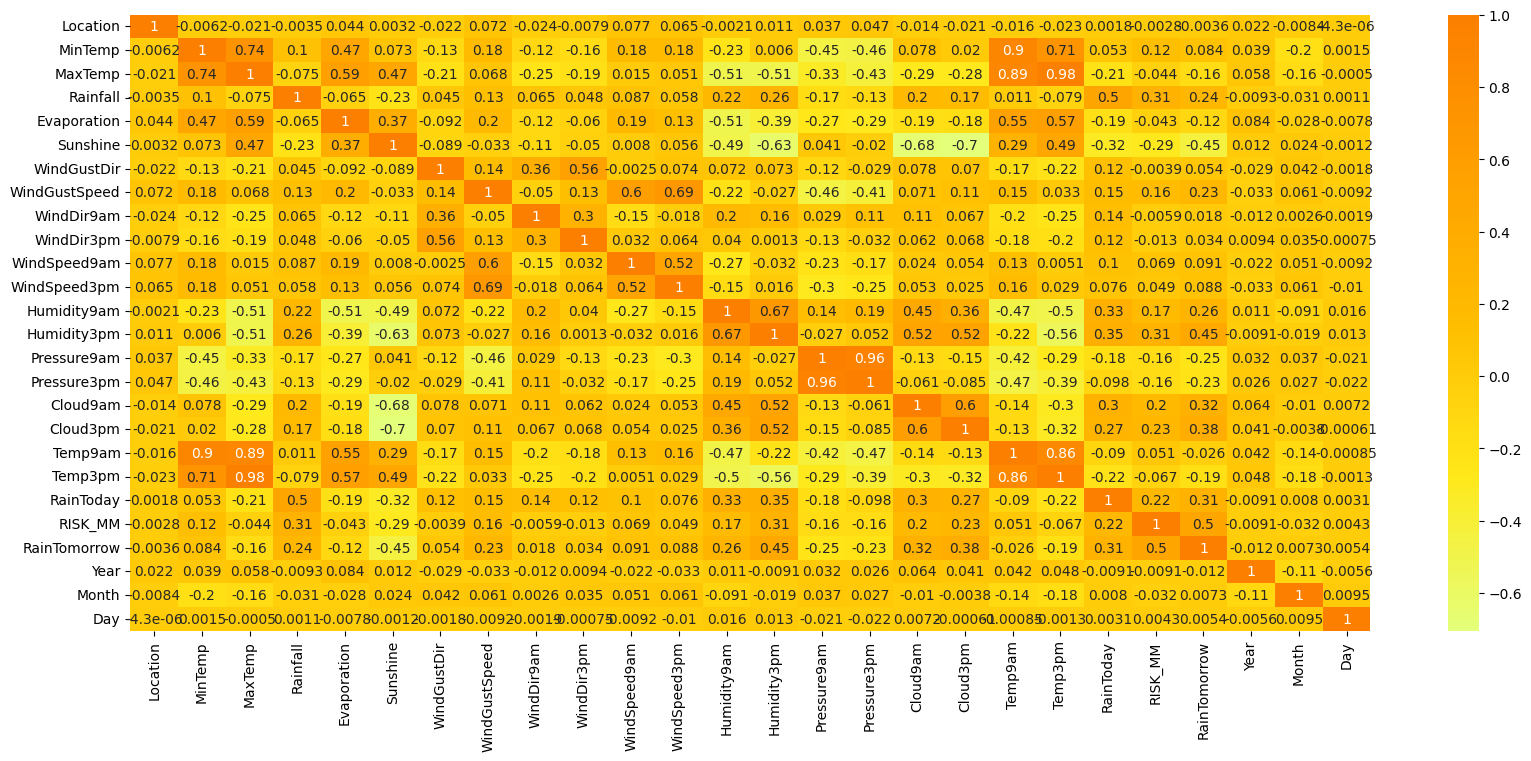

In [90]:
# correlation plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,8]
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)


In [91]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [92]:
'''
here in this data few features has NaN or null values 
like : Evaporation : 60843, Sunshine : 67816, Cloud9am : 53657, Cloud3pm : 57094
so we can drop them
'''
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [93]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,1007.7,1007.1,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,1010.6,1007.8,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,1007.6,1008.7,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,1017.6,1012.8,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,1010.8,1006.0,17.8,29.7,0,0.2,0,2008,12,5


In [94]:
df.shape

(142193, 22)

In [95]:
corr = df.corr(numeric_only=True)
corr

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
Location,1.000000,-0.006202,-0.020503,-0.003476,-0.022076,0.072039,-0.023564,-0.007895,0.077313,0.064784,...,0.037096,0.047098,-0.015619,-0.022897,0.001831,-0.002788,-0.003579,0.022265,-0.008375,-0.000004
MinTemp,-0.006202,1.000000,0.736267,0.104255,-0.125099,0.177285,-0.124257,-0.158158,0.176005,0.175749,...,-0.451260,-0.461623,0.901813,0.708865,0.052938,0.124743,0.083936,0.039245,-0.204279,0.001507
MaxTemp,-0.020503,0.736267,1.000000,-0.074839,-0.206575,0.067690,-0.246914,-0.185418,0.014680,0.050800,...,-0.332293,-0.427279,0.887020,0.984562,-0.214304,-0.044208,-0.159237,0.058388,-0.164622,-0.000495
Rainfall,-0.003476,0.104255,-0.074839,1.000000,0.044721,0.133497,0.065342,0.048477,0.086816,0.057759,...,-0.168085,-0.126728,0.011477,-0.079178,0.500997,0.308557,0.239032,-0.009284,-0.030863,0.001134
WindGustDir,-0.022076,-0.125099,-0.206575,0.044721,1.000000,0.143257,0.357879,0.561563,-0.002466,0.074236,...,-0.120512,-0.029451,-0.169026,-0.220776,0.120754,-0.003861,0.054488,-0.029149,0.042421,-0.001847
WindGustSpeed,0.072039,0.177285,0.067690,0.133497,0.143257,1.000000,-0.050423,0.129476,0.604837,0.686419,...,-0.457891,-0.412922,0.150258,0.032970,0.146862,0.162923,0.234010,-0.032708,0.060918,-0.009226
WindDir9am,-0.023564,-0.124257,-0.246914,0.065342,0.357879,-0.050423,1.000000,0.295262,-0.154530,-0.017705,...,0.028761,0.108598,-0.202073,-0.249608,0.138636,-0.005924,0.018436,-0.011871,0.002614,-0.001891
WindDir3pm,-0.007895,-0.158158,-0.185418,0.048477,0.561563,0.129476,0.295262,1.000000,0.031613,0.063680,...,-0.131113,-0.032413,-0.177395,-0.197219,0.117347,-0.013259,0.034435,0.009355,0.035113,-0.000749
WindSpeed9am,0.077313,0.176005,0.014680,0.086816,-0.002466,0.604837,-0.154530,0.031613,1.000000,0.519971,...,-0.227923,-0.174916,0.129298,0.005108,0.100302,0.069404,0.090995,-0.021620,0.051039,-0.009183
WindSpeed3pm,0.064784,0.175749,0.050800,0.057759,0.074236,0.686419,-0.017705,0.063680,0.519971,1.000000,...,-0.295567,-0.254988,0.163601,0.028567,0.076483,0.049240,0.087817,-0.032806,0.061006,-0.009969


In [96]:
round(df.corr(),2) # here round , 2 gives two decimals after .__

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
Location,1.00,-0.01,-0.02,-0.00,-0.02,0.07,-0.02,-0.01,0.08,0.06,...,0.04,0.05,-0.02,-0.02,0.00,-0.00,-0.00,0.02,-0.01,-0.00
MinTemp,-0.01,1.00,0.74,0.10,-0.13,0.18,-0.12,-0.16,0.18,0.18,...,-0.45,-0.46,0.90,0.71,0.05,0.12,0.08,0.04,-0.20,0.00
MaxTemp,-0.02,0.74,1.00,-0.07,-0.21,0.07,-0.25,-0.19,0.01,0.05,...,-0.33,-0.43,0.89,0.98,-0.21,-0.04,-0.16,0.06,-0.16,-0.00
Rainfall,-0.00,0.10,-0.07,1.00,0.04,0.13,0.07,0.05,0.09,0.06,...,-0.17,-0.13,0.01,-0.08,0.50,0.31,0.24,-0.01,-0.03,0.00
WindGustDir,-0.02,-0.13,-0.21,0.04,1.00,0.14,0.36,0.56,-0.00,0.07,...,-0.12,-0.03,-0.17,-0.22,0.12,-0.00,0.05,-0.03,0.04,-0.00
WindGustSpeed,0.07,0.18,0.07,0.13,0.14,1.00,-0.05,0.13,0.60,0.69,...,-0.46,-0.41,0.15,0.03,0.15,0.16,0.23,-0.03,0.06,-0.01
WindDir9am,-0.02,-0.12,-0.25,0.07,0.36,-0.05,1.00,0.30,-0.15,-0.02,...,0.03,0.11,-0.20,-0.25,0.14,-0.01,0.02,-0.01,0.00,-0.00
WindDir3pm,-0.01,-0.16,-0.19,0.05,0.56,0.13,0.30,1.00,0.03,0.06,...,-0.13,-0.03,-0.18,-0.20,0.12,-0.01,0.03,0.01,0.04,-0.00
WindSpeed9am,0.08,0.18,0.01,0.09,-0.00,0.60,-0.15,0.03,1.00,0.52,...,-0.23,-0.17,0.13,0.01,0.10,0.07,0.09,-0.02,0.05,-0.01
WindSpeed3pm,0.06,0.18,0.05,0.06,0.07,0.69,-0.02,0.06,0.52,1.00,...,-0.30,-0.25,0.16,0.03,0.08,0.05,0.09,-0.03,0.06,-0.01


In [97]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [98]:
'''
from above correlations 
few features has very high corelations, it means they have same informatons
so if we want we can drop, (but this assumption is not same all the time)
for now i'm droping those features for this dataset 
'''
df.drop(['MinTemp','MaxTemp','Temp3pm','Pressure3pm','RISK_MM'],axis=1,inplace=True)

In [99]:
df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp9am,RainToday,RainTomorrow,Year,Month,Day
0,2,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,16.9,0,0,2008,12,1
1,2,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,17.2,0,0,2008,12,2
2,2,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,21.0,0,0,2008,12,3
3,2,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,18.1,0,0,2008,12,4
4,2,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,17.8,0,0,2008,12,5


In [100]:
round(df.corr(),2)

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp9am,RainToday,RainTomorrow,Year,Month,Day
Location,1.00,-0.00,-0.02,0.07,-0.02,-0.01,0.08,0.06,-0.00,0.01,0.04,-0.02,0.00,-0.00,0.02,-0.01,-0.00
Rainfall,-0.00,1.00,0.04,0.13,0.07,0.05,0.09,0.06,0.22,0.26,-0.17,0.01,0.50,0.24,-0.01,-0.03,0.00
WindGustDir,-0.02,0.04,1.00,0.14,0.36,0.56,-0.00,0.07,0.07,0.07,-0.12,-0.17,0.12,0.05,-0.03,0.04,-0.00
WindGustSpeed,0.07,0.13,0.14,1.00,-0.05,0.13,0.60,0.69,-0.22,-0.03,-0.46,0.15,0.15,0.23,-0.03,0.06,-0.01
WindDir9am,-0.02,0.07,0.36,-0.05,1.00,0.30,-0.15,-0.02,0.20,0.16,0.03,-0.20,0.14,0.02,-0.01,0.00,-0.00
WindDir3pm,-0.01,0.05,0.56,0.13,0.30,1.00,0.03,0.06,0.04,0.00,-0.13,-0.18,0.12,0.03,0.01,0.04,-0.00
WindSpeed9am,0.08,0.09,-0.00,0.60,-0.15,0.03,1.00,0.52,-0.27,-0.03,-0.23,0.13,0.10,0.09,-0.02,0.05,-0.01
WindSpeed3pm,0.06,0.06,0.07,0.69,-0.02,0.06,0.52,1.00,-0.15,0.02,-0.30,0.16,0.08,0.09,-0.03,0.06,-0.01
Humidity9am,-0.00,0.22,0.07,-0.22,0.20,0.04,-0.27,-0.15,1.00,0.67,0.14,-0.47,0.33,0.26,0.01,-0.09,0.02
Humidity3pm,0.01,0.26,0.07,-0.03,0.16,0.00,-0.03,0.02,0.67,1.00,-0.03,-0.22,0.35,0.45,-0.01,-0.02,0.01


In [101]:
df.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp9am,RainToday,RainTomorrow,Year,Month,Day
0,2,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,16.9,0,0,2008,12,1
1,2,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,17.2,0,0,2008,12,2
2,2,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,21.0,0,0,2008,12,3
3,2,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,18.1,0,0,2008,12,4
4,2,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,17.8,0,0,2008,12,5


In [102]:
df.shape

(142193, 17)

In [103]:
df.isnull().sum()

Location             0
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Temp9am            904
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [104]:
df = df.fillna(0)

# Target feature

In [105]:
df.RainTomorrow.describe()

count    142193.000000
mean          0.224181
std           0.417043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainTomorrow, dtype: float64

In [106]:
df.RainTomorrow.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

In [107]:
df['RainTomorrow'].unique()

array([0, 1])

In [108]:
df['RainTomorrow'].nunique()

2

In [109]:
percentage = df.RainTomorrow.value_counts()/len(df)
percentage

RainTomorrow
0    0.775819
1    0.224181
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x79bae0d717b0>,
 [Text(-0.8382813733394672, 0.7122389620851256, '0 class'),
  Text(0.9144887345423496, -0.7769880014486276, '1 class')],
 [Text(-0.45724438545789114, 0.38849397931915935, '77.6%'),
  Text(0.5334517618163706, -0.45324300084503266, '22.4%')])

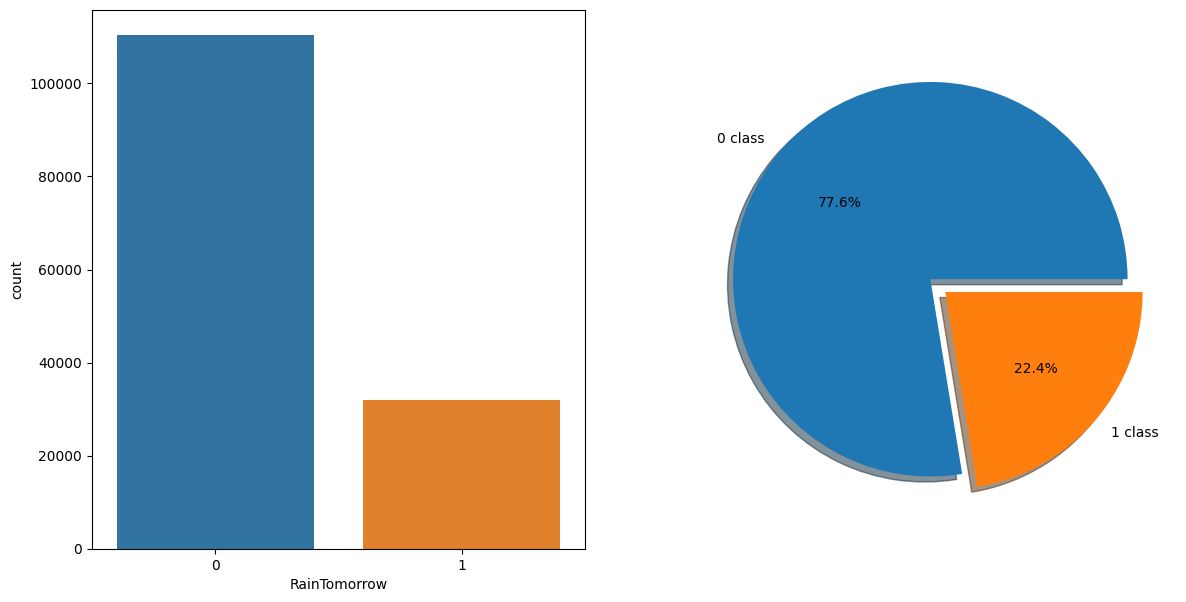

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [14,7]
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.countplot(data = df,x='RainTomorrow',ax=ax1)
plt.pie(percentage,labels=['0 class','1 class'],autopct='%.1f%%',shadow=True,explode = [0,0.1])

#for i in ax.patches:
   # ax.annotate((i.get_height()),i.get_x()+0.3,i.get_height()+10)

# separating Features and Target variables

In [111]:
# here our target variable is 'RainTomorrow'
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [112]:
x.columns

Index(['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Temp9am', 'RainToday', 'Year', 'Month',
       'Day'],
      dtype='object')

# Spliting Training data and Test data

In [113]:
df_train = df.iloc[:99536]
df_test = df.iloc[99537:]

In [114]:
df_train = df_train.reset_index()
x_train = df_train.loc[:,['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Temp9am', 'RainToday', 'Year','Month', 'Day']]
y_train = df_train.loc[:,['RainTomorrow']]
x_test = df_test.loc[:,['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am','WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Temp9am', 'RainToday', 'Year','Month', 'Day']]
y_test = df_test.loc[:,['RainTomorrow']]


In [115]:
# Normalization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # (x-u)/sigma
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [116]:
# importing LogisticRegression
 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [117]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [118]:
log_reg.coef_

array([[-0.07007927,  0.11624854,  0.2174751 ,  0.63947484, -0.18315066,
        -0.03587487, -0.06120154, -0.2293345 ,  0.03016541,  1.11129268,
        -0.09834604,  0.19239152,  0.32362128, -0.04769545,  0.01960322,
        -0.00930326]])

In [119]:
log_reg.intercept_

array([-1.5923574])

# Checking 'accuracy_score', 'precision_score', 'recall_score', 'confusion_matrix', classification_report', and 'f1-score'.

In [120]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test,y_pred)

In [121]:
print('accuracy : ',accuracy)
print('precision :', precision)
print('recall :',recall)
print('confusion matrix :\n',conf_matrix)
print('classification repot :\n',classification_report_str)

accuracy :  0.8462818829707427
precision : 0.7709739633558341
recall : 0.36320272572402046
confusion matrix :
 [[32901   950]
 [ 5607  3198]]
classification repot :
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     33851
           1       0.77      0.36      0.49      8805

    accuracy                           0.85     42656
   macro avg       0.81      0.67      0.70     42656
weighted avg       0.84      0.85      0.82     42656



In [122]:
'''
from above confusion matrix we got:
True Positive = 33289
True Negative = 7627
False Positive = 562
False Negative = 1178
'''

'\nfrom above confusion matrix we got:\nTrue Positive = 33289\nTrue Negative = 7627\nFalse Positive = 562\nFalse Negative = 1178\n'

# Check for overfitting and underfitting.

In [123]:
#print the score on training and test set
print('Training set score : {:.4f}'.format(log_reg.score(x_train,y_train)))
print('Test set score : {:.4f}'.format(log_reg.score(x_test,y_test)))

Training set score : 0.8292
Test set score : 0.8463


In [124]:
'''
The training-set Accuracy score is '0.9526' and the test-set Accuracy score is '0.9592'. These two values are comparable. so, these is no overfitting.
'''

"\nThe training-set Accuracy score is '0.9526' and the test-set Accuracy score is '0.9592'. These two values are comparable. so, these is no overfitting.\n"

In [125]:
'''
In logistic regression, we use a default  value of c = 1. It provides good performance with
more than 95% accuracy on both training and test set. 
But the model performance on both training and test are very comparable. It is likely the case of underfitting.

so, for that i'll increase 'C' and fit it a more flexible model.
'''

"\nIn logistic regression, we use a default  value of c = 1. It provides good performance with\nmore than 95% accuracy on both training and test set. \nBut the model performance on both training and test are very comparable. It is likely the case of underfitting.\n\nso, for that i'll increase 'C' and fit it a more flexible model.\n"

In [126]:
# fit the Logistic Regression model with 'C = 10'
# instantiate the model
log_reg_10 = LogisticRegression(C=10,solver='liblinear',random_state=23)

In [127]:
log_reg_10.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=23, solver='liblinear')

In [128]:
# print the score on test and training set
print('Training set score : {:.4f}'.format(log_reg_10.score(x_train,y_train)))
print('Test ste score : {:.4f}'.format(log_reg_10.score(x_test,y_test)))

Training set score : 0.8292
Test ste score : 0.8463


In [129]:
'''
we can see that, 'C = 10' results in inreasing of both test and training set accuracy.
So, we can say that more complex problem
'''

"\nwe can see that, 'C = 10' results in inreasing of both test and training set accuracy.\nSo, we can say that more complex problem\n"

# Adjusting the Threshold level

In [130]:
# print the first 10 probabilities of two classesc- 0 to 1
y_pred_prob = log_reg.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.93752662, 0.06247338],
       [0.95530172, 0.04469828],
       [0.39736502, 0.60263498],
       [0.69567449, 0.30432551],
       [0.82550402, 0.17449598],
       [0.7169642 , 0.2830358 ],
       [0.58788762, 0.41211238],
       [0.78053208, 0.21946792],
       [0.70120744, 0.29879256],
       [0.79380011, 0.20619989]])